In [1]:
from spineq.optimise import calc_coverage, calc_oa_weights, optimise
from spineq.plotting import plot_optimisation_result

import pandas as pd

In [16]:
n_sensors = 20
theta = 500

pop_age_groups = {"pop_total": {'min': 0, 'max': 90, 'weight': 0}}
population_weight = 0
workplace_weight = 1

title = "Workplace Network"

In [17]:
result = optimise(
    n_sensors=n_sensors,
    theta=theta,
    pop_age_groups=pop_age_groups,
    population_weight=population_weight,
    workplace_weight=workplace_weight
)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.23
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.32
Placing sensor 5 out of 20 ... coverage = 0.36
Placing sensor 6 out of 20 ... coverage = 0.39
Placing sensor 7 out of 20 ... coverage = 0.42
Placing sensor 8 out of 20 ... coverage = 0.45
Placing sensor 9 out of 20 ... coverage = 0.47
Placing sensor 10 out of 20 ... coverage = 0.48
Placing sensor 11 out of 20 ... coverage = 0.50
Placing sensor 12 out of 20 ... coverage = 0.51
Placing sensor 13 out of 20 ... coverage = 0.53
Placing sensor 14 out of 20 ... coverage = 0.54
Placing sensor 15 out of 20 ... coverage = 0.55
Placing sensor 16 out of 20 ... coverage = 0.56
Placing sensor 17 out of 20 ... coverage = 0.57
Placing sensor 18 out of 20 ... coverage = 0.59
Placing sensor 19 out of 20 ... coverage = 0.60
Placing sensor 20 out of 20 ... coverage = 0.61


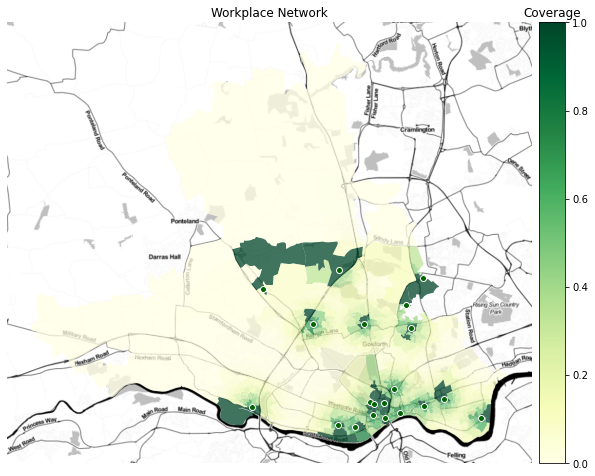

In [4]:
plot_optimisation_result(result, title=title)

In [9]:
oa_weight = calc_oa_weights(
    population_weight=1,
    workplace_weight=0
)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("total population coverage: {:.2f}".format(cov["total_coverage"]))

total population coverage: 0.20


In [11]:
oa_weight = calc_oa_weights(
    population_weight=0,
    workplace_weight=1
)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("place of work coverage: {:.2f}".format(cov["total_coverage"]))

place of work coverage: 0.61


In [13]:
oa_weight = calc_oa_weights(
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={"pop_children": {'min': 0, 'max': 16, 'weight': 1}}
)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("children <= 16 coverage: {:.2f}".format(cov["total_coverage"]))

children <= 16 coverage: 0.17


In [14]:
oa_weight = calc_oa_weights(
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={"pop_elderly": {'min': 70, 'max': 90, 'weight': 1}}
)
cov = calc_coverage(result["sensors"], oa_weight, theta=theta)
print("adults >= 70 coverage: {:.2f}".format(cov["total_coverage"]))

adults >= 70 coverage: 0.15
